# Importing libraries

In [1]:
!pip install -q mtcnn

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import random
import cv2

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

from PIL import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

from mtcnn.mtcnn import MTCNN

|          | 0/? [00:00<?, ?it/s]

In [3]:
PATH = '/kaggle/input/data-test/data/train/Kim_Da_Mi/'

ROOT_PATH = '/kaggle/input/data-test/data/'

TRAIN_PATH = '/kaggle/input/data-test/data/train/'

VAL_PATH = '/kaggle/input/data-test/data/val/'

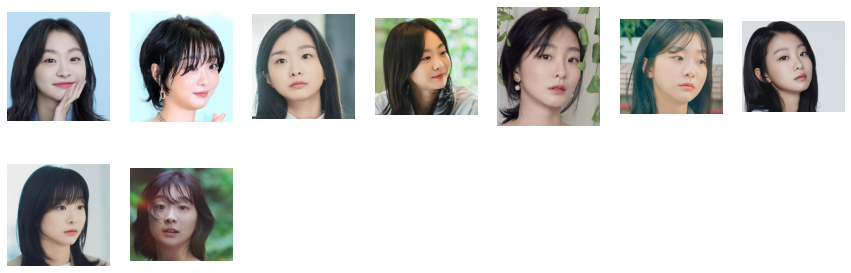

In [157]:
#in từng hình ảnh của Sĩ
plt.figure(figsize=(15,5))
for i, filename in enumerate(os.listdir(PATH)):
    path = PATH + filename
    image = plt.imread(path)
    
    plt.subplot(2, 7, i+1)
    
    plt.axis('off')
    plt.imshow(image)
    
plt.show()

# Detect faces using MTCNN

In [4]:
#hàm cắt ra khuôn mặt sử dụng MTCNN, nhận đầu vào là một mảng 2 chiều biểu diễn ảnh
def extract_face(image_array, required_size=(160, 160)):
    
    pixels = image_array
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    
    x2, y2 = x1 + width, y1 + height
    
    face = pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    
    image = image.resize(required_size)
    face_array = np.asarray(image)
    
    return face_array

|          | 0/? [00:00<?, ?it/s]

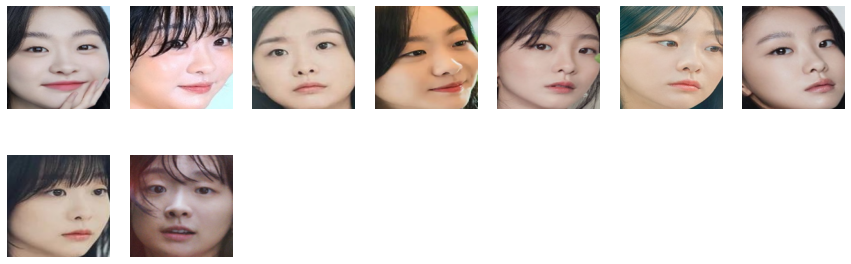

In [158]:
#in ra ảnh của Sĩ sau khi lấy ra được khuôn mặt
plt.figure(figsize=(15,5))
for i, filename in tqdm(enumerate(os.listdir(PATH))):
    path = PATH + filename
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    face = extract_face(image)
    
    #print(i+1, face.shape)
    
    plt.subplot(2, 7, i+1)
    
    plt.axis('off')
    plt.imshow(face)
    
plt.show()

# Draw a bounding box for each face

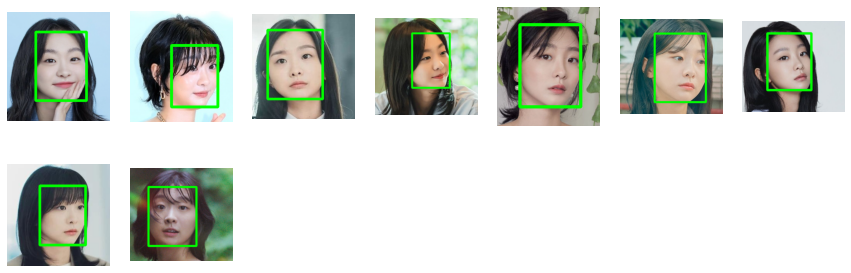

In [5]:
plt.figure(figsize=(15,5))
for i, filename in enumerate(os.listdir(PATH)):
    path = PATH + filename
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # detect mặt
    detector = MTCNN()
    detections = detector.detect_faces(image_rgb)

    # vẽ bounding box
    for face in detections:
        x, y, width, height = face['box']
        cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 5)

    plt.subplot(2, 7, i+1)
    plt.axis('off')
    plt.imshow(image_rgb)
plt.show()

In [5]:
def load_faces(directory):
    faces = list()
    for file_name in tqdm(os.listdir(directory)):
        path = directory + file_name
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        face = extract_face(image)
        
        faces.append(face)
    return faces

def load_dataset(directory):
    images, labels = list(), list()
    for folder in tqdm(os.listdir(directory)):
        path = directory + folder + '/'
        
        if not os.path.isdir(path):
            continue
        
        try:
            faces = load_faces(path)
        except Exception:
            print(path)
        print(f'Person : {folder}, Photo : {len(faces)}')

        label = [folder for _ in range(len(faces))]

        images.extend(faces)
        labels.extend(label)
        
    return np.asarray(images), np.asarray(labels)

In [6]:
X_train, y_train = load_dataset(TRAIN_PATH)

X_test, y_test = load_dataset(VAL_PATH)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Person : Gumaysi, Photo : 11


  0%|          | 0/10 [00:00<?, ?it/s]

Person : Hoang_Dung, Photo : 10


  0%|          | 0/11 [00:00<?, ?it/s]

Person : Do_Mixi, Photo : 11


  0%|          | 0/5 [00:00<?, ?it/s]

Person : Do_Viet_Cuong, Photo : 5


  0%|          | 0/12 [00:00<?, ?it/s]

Person : Den_Vau, Photo : 12


  0%|          | 0/9 [00:00<?, ?it/s]

Person : Kim_Da_Mi, Photo : 9


  0%|          | 0/11 [00:00<?, ?it/s]

Person : Pew_pew, Photo : 11


  0%|          | 0/11 [00:00<?, ?it/s]

Person : Faker, Photo : 11


  0%|          | 0/10 [00:00<?, ?it/s]

Person : Ngo_Bao_Chau, Photo : 10


  0%|          | 0/10 [00:00<?, ?it/s]

Person : Duc_Si, Photo : 10


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Person : Gumaysi, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Hoang_Dung, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Do_mixi, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Do_Viet_Cuong, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Den_Vau, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Kim_Da_Mi, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Pew_Pew, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Faker, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Ngo_Bao_Chau, Photo : 1


  0%|          | 0/1 [00:00<?, ?it/s]

Person : Duc_Si, Photo : 1


# Embedding

In [7]:
face_pixels = X_train[0]

print(face_pixels.shape)

face_pixels = np.expand_dims(face_pixels, axis=0)
print(face_pixels.shape)

(160, 160, 3)
(1, 160, 160, 3)


In [8]:
from keras.models import load_model

#hàm nhúng ảnh thành vector, nhận đầu vào là khuôn mặt lấy được từ ảnh gốc, trả về vector nhúng
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    
    #chuẩn hóa ảnh
    mean, std = face_pixels.mean(), face_pixels.std() 
    face_pixels = (face_pixels - mean) / std
    
    samples = np.expand_dims(face_pixels, axis=0)
    
    yhat = model.predict(samples)
    
    return yhat[0]

In [9]:
face_net_model = load_model('/kaggle/input/kerasfaceneth5/facenet_keras.h5')

In [11]:
trainX = [] #tạo list rỗng, duyệt từng ảnh trong tập X_train, nhúng ảnh xong thêm vào trainX

for pixels in tqdm(X_train):
    embedding = get_embedding(face_net_model, pixels)
    trainX.append(embedding)
trainX = np.asarray(trainX)

print('Train X :', trainX.shape)


testX = [] #tạo list rỗng, duyệt từng ảnh trong tập X_test, nhúng ảnh xong thêm vào testX

for pixels in tqdm(X_test):
    embedding = get_embedding(face_net_model, pixels)
    testX.append(embedding)
testX = np.asarray(testX)

print('test X :', testX.shape)

  0%|          | 0/100 [00:00<?, ?it/s]

Train X : (100, 128)


  0%|          | 0/10 [00:00<?, ?it/s]

test X : (10, 128)


In [12]:
trainX.shape

(100, 128)

In [13]:
testX.shape

(10, 128)

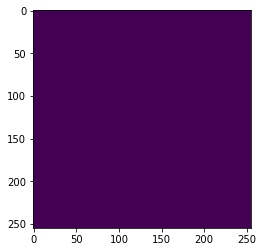

In [14]:
face_pixels = X_train[0]
mean, std = face_pixels.mean(), face_pixels.std() 
face_pixels = (face_pixels)
face_pixels
plt.imshow(np.zeros(shape=(255, 255)))

# Predict

In [15]:
label = LabelEncoder()

trainy = label.fit_transform(y_train)
testy = label.fit_transform(y_test)

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(trainX, trainy)

yhat_train = svc_model.predict(trainX)
yhat_test = svc_model.predict(testX)

score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=80.000


Probability :  63.36%, 
Person - Predicted : Pew_Pew, Actual : Pew_Pew


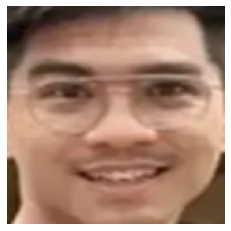

In [23]:
# random.seed(100)
selection = random.choice([i for i in range(testX.shape[0])])

face = X_test[selection]

yhat_prob = svc_model.predict_proba(testX[selection].reshape(1,-1))
yhat = svc_model.predict(testX[selection].reshape(1,-1))

celeb = label.inverse_transform(yhat)
plt.imshow(face)
plt.axis('off')

print(f'Probability : {np.max(yhat_prob)*100: .2f}%, \nPerson - Predicted : {celeb[0]}, Actual : {y_test[selection]}')

# Visualize embedded vectors

<AxesSubplot:xlabel='X', ylabel='y'>

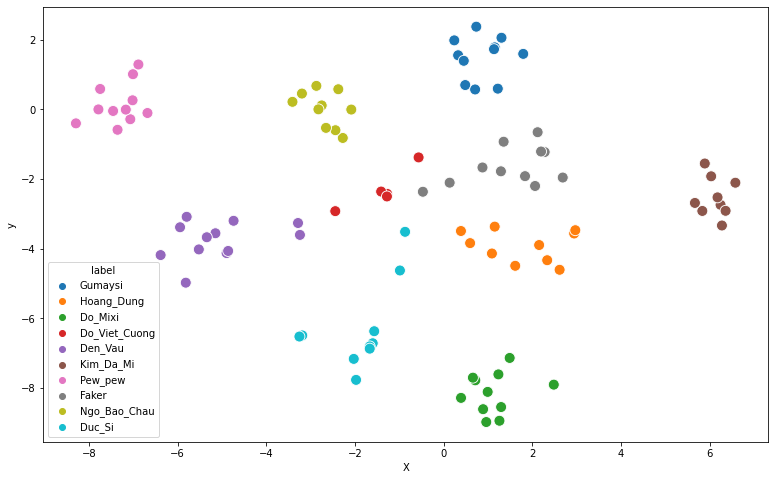

In [534]:
np.random.seed(12)

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(learning_rate=100)

tsne_features = tsne.fit_transform(trainX)

X = tsne_features[:,0]
y = tsne_features[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

# BUG FIXED

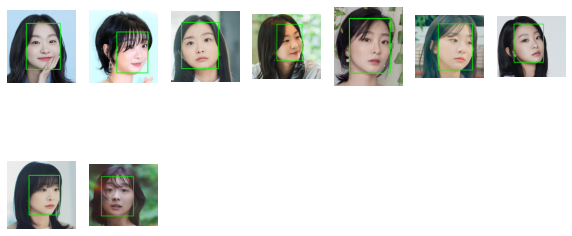

In [19]:
error_path = '/kaggle/input/data-test/data/train/Kim_Da_Mi/'

plt.figure(figsize=(10,5))
for i, filename in enumerate(os.listdir(error_path)):
    path = error_path + filename
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Detect faces
    detections = detector.detect_faces(image_rgb)

    # Draw bounding boxes
    for face in detections:
        x, y, width, height = face['box']
        cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)

    plt.subplot(2, 7, i+1)
    
    plt.axis('off')
    plt.imshow(image_rgb)
    
plt.show()

# Testing predict function

## Predict function

In [128]:
def predict_image(image, clf_model):
    detector = MTCNN()
    detections = detector.detect_faces(image)
    extracted_face = extract_face(image)
    embedded = get_embedding(face_net_model, extracted_face)

    y_pred = clf_model.predict(embedded.reshape(1,-1))
    y_prob = clf_model.predict_proba(embedded.reshape(1, -1))
    class_pred = label.inverse_transform(y_pred)
    
    image_copy = image.copy()
    
    for face in detections:
        x, y, width, height = face['box']
        cv2.rectangle(image_copy, (x, y), (x + width, y + height), (0, 255, 0), 3)
        if np.max(y_prob) * 100 < 20:
            class_pred[0] = 'Unknown'
        cv2.putText(image_copy, f'{class_pred[0]} -{np.max(y_prob) * 100: .2f}%', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(image_copy)
    plt.axis('off')
    print(y_pred)
    print(class_pred)
    print(y_prob)
    

## Saved image

In [17]:
path = '/kaggle/input/data-test/data/train/Faker/Screenshot 2024-10-25 194432.png'  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[4]
['Faker']
[[0.03830391 0.02924901 0.11594669 0.0645993  0.50429268 0.05259094
  0.08127716 0.03397988 0.05611882 0.0236416 ]]


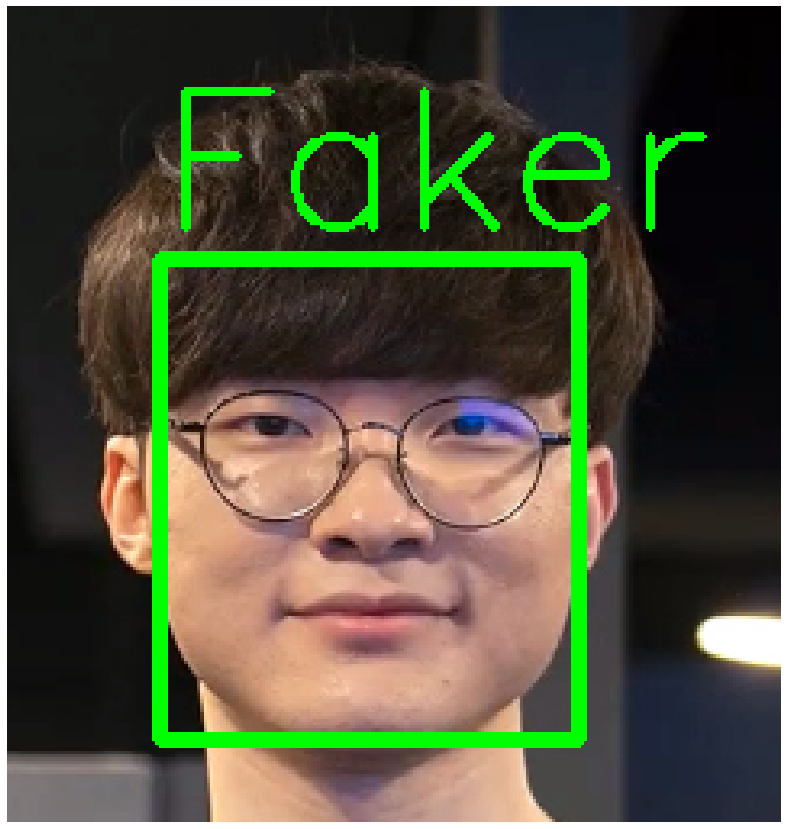

In [18]:
predict_image(image, svc_model)

In [542]:
face = extract_face(image)

In [543]:
face

array([[[ 10,   9,  14],
        [ 10,   9,  14],
        [ 10,   9,  14],
        ...,
        [ 21,  14,  22],
        [ 32,  25,  33],
        [ 42,  35,  43]],

       [[ 10,   9,  14],
        [ 10,   9,  14],
        [ 11,  10,  15],
        ...,
        [ 28,  21,  29],
        [ 32,  25,  33],
        [ 38,  31,  39]],

       [[ 10,   9,  14],
        [ 10,   9,  14],
        [ 11,  10,  15],
        ...,
        [ 43,  37,  45],
        [ 39,  33,  40],
        [ 35,  29,  37]],

       ...,

       [[193, 199, 234],
        [185, 191, 228],
        [186, 189, 227],
        ...,
        [246, 244, 249],
        [246, 246, 250],
        [244, 246, 251]],

       [[188, 194, 230],
        [182, 187, 225],
        [185, 188, 226],
        ...,
        [249, 243, 249],
        [246, 243, 249],
        [240, 238, 244]],

       [[186, 192, 230],
        [183, 188, 226],
        [185, 188, 227],
        ...,
        [255, 248, 255],
        [253, 248, 254],
        [241, 239, 246]]

In [544]:
embedded = get_embedding(face_net_model, face)

y_pred = svc_model.predict(embedded.reshape(1,-1))
y_prob = svc_model.predict_proba(embedded.reshape(1, -1))
class_pred = label.inverse_transform(y_pred)
np.max(y_prob) * 100

56.41385510092972

In [545]:
testX[9] #embedded test vector of Nguyen Duc Si

array([ 0.46593046, -0.9082285 , -1.6613203 , -0.69751936, -1.8659911 ,
        0.6295131 ,  0.12006991, -0.8287012 , -0.2028791 , -0.3195615 ,
        0.20970553, -0.23519675, -1.1101202 , -1.0853207 , -0.5678036 ,
        0.43834394,  1.2218289 , -0.38286543,  0.17224658, -0.56006604,
        0.47585776, -0.79713786, -2.2041159 , -0.5211481 ,  0.61005753,
       -0.04594154,  0.30356574, -0.32427415,  0.8723947 ,  0.6665303 ,
        1.4816766 ,  1.7491045 ,  1.1531806 , -0.46446574, -0.02797446,
       -0.37857047, -2.1828427 ,  0.26588872,  1.7428036 ,  0.06501006,
        0.5327966 , -0.0645033 , -1.7646337 , -0.9615626 ,  1.5383555 ,
       -0.29724413, -0.33574548,  1.4674535 , -0.6735    , -0.2796959 ,
       -0.5674841 ,  0.72874165,  0.41362464,  0.4438376 ,  1.6399229 ,
        0.91201186, -0.55341667, -1.4556247 ,  1.0172832 , -0.4571584 ,
        0.41014814, -0.6671579 ,  0.06717806, -0.19435975,  1.3204479 ,
        1.2712575 ,  1.0431967 , -0.3510067 , -0.8475499 , -1.09

In [546]:
embedded #embedded test vector of Nguyen Duc Si

array([ 0.46593046, -0.9082285 , -1.6613203 , -0.69751936, -1.8659911 ,
        0.6295131 ,  0.12006991, -0.8287012 , -0.2028791 , -0.3195615 ,
        0.20970553, -0.23519675, -1.1101202 , -1.0853207 , -0.5678036 ,
        0.43834394,  1.2218289 , -0.38286543,  0.17224658, -0.56006604,
        0.47585776, -0.79713786, -2.2041159 , -0.5211481 ,  0.61005753,
       -0.04594154,  0.30356574, -0.32427415,  0.8723947 ,  0.6665303 ,
        1.4816766 ,  1.7491045 ,  1.1531806 , -0.46446574, -0.02797446,
       -0.37857047, -2.1828427 ,  0.26588872,  1.7428036 ,  0.06501006,
        0.5327966 , -0.0645033 , -1.7646337 , -0.9615626 ,  1.5383555 ,
       -0.29724413, -0.33574548,  1.4674535 , -0.6735    , -0.2796959 ,
       -0.5674841 ,  0.72874165,  0.41362464,  0.4438376 ,  1.6399229 ,
        0.91201186, -0.55341667, -1.4556247 ,  1.0172832 , -0.4571584 ,
        0.41014814, -0.6671579 ,  0.06717806, -0.19435975,  1.3204479 ,
        1.2712575 ,  1.0431967 , -0.3510067 , -0.8475499 , -1.09

## Get image by url

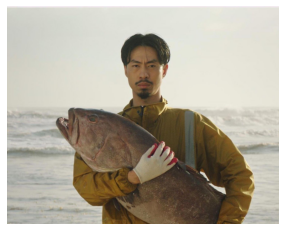

In [129]:
import numpy as np
import requests

url = 'https://thanhnien.mediacdn.vn/Uploaded/duyphuc/2021_12_30/hinh-1-5084.jpg'

# Tải ảnh từ URL
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

plt.axis('off')
plt.imshow(image_rgb)

[0]
['Den_Vau']
[[0.75570179 0.01562498 0.06291035 0.02459982 0.03903022 0.01544723
  0.01482704 0.01766094 0.02865609 0.02554155]]


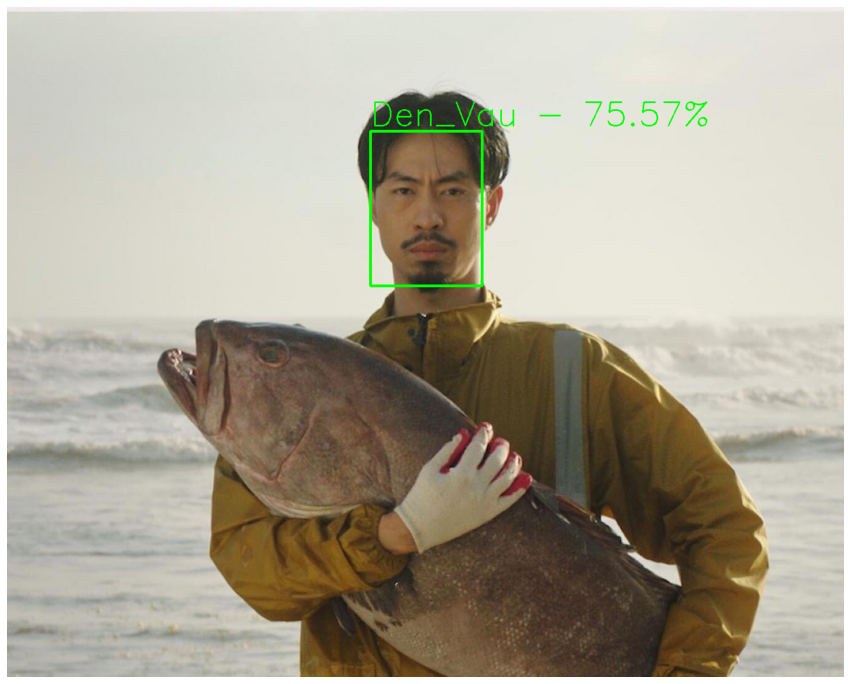

In [130]:
predict_image(image_rgb, svc_model)

# Multi-face recognition

In [19]:
def extract_multi_face(image_array, required_size = (160, 160)):
    pixels = image_array
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    extracted_list = list()
    
    for face in results:
        # extract the bounding box from the first face
        x1, y1, width, height = face['box']
        
        # bug fix
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height

        face = pixels[y1:y2, x1:x2]
        
        image = Image.fromarray(face)

        image = image.resize(required_size)
        face_array = np.asarray(image)
        extracted_list.append(face_array)
    return extracted_list

In [20]:
def predict_multi_face(image_array, clf_model):
    detector = MTCNN()
    detections = detector.detect_faces(image_array)
    extracted_list = extract_multi_face(image_array)
    probability_list = []  
    predicted_labels = list()
    for face in extracted_list:
        embedded = get_embedding(face_net_model, face)
        y_pred = clf_model.predict(embedded.reshape(1,-1))
        y_prob = clf_model.predict_proba(embedded.reshape(1, -1))
        probability_list.append(np.max(y_prob))
        class_pred = label.inverse_transform(y_pred)
        predicted_labels.append(class_pred)
    
    image_array_copy = image_array.copy()
    
    for i, face in enumerate(detections):
        x, y, width, height = face['box']
        cv2.rectangle(image_array_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)
        predicted_class = predicted_labels[i][0]
        if np.max(y_prob) * 100 < 40:
            predicted_class = 'Unknown'
        cv2.putText(image_array_copy, f'{predicted_class} -{probability_list[i] * 100: .2f}%', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    plt.figure(figsize = (15, 15))
    plt.axis('off')
    plt.imshow(image_array_copy)

In [23]:
url = 'https://cdn.tuoitre.vn/471584752817336320/2024/9/4/kim-da-mi1-our-beloved-summer-1725462272165208322197.jpg'
# Tải ảnh từ URL
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

extracted_list = extract_multi_face(image_rgb)

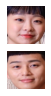

In [52]:
for i, face in enumerate(extracted_list):
    plt.subplot(5, 1, i + 1)
    plt.axis('off')
    plt.imshow(face)

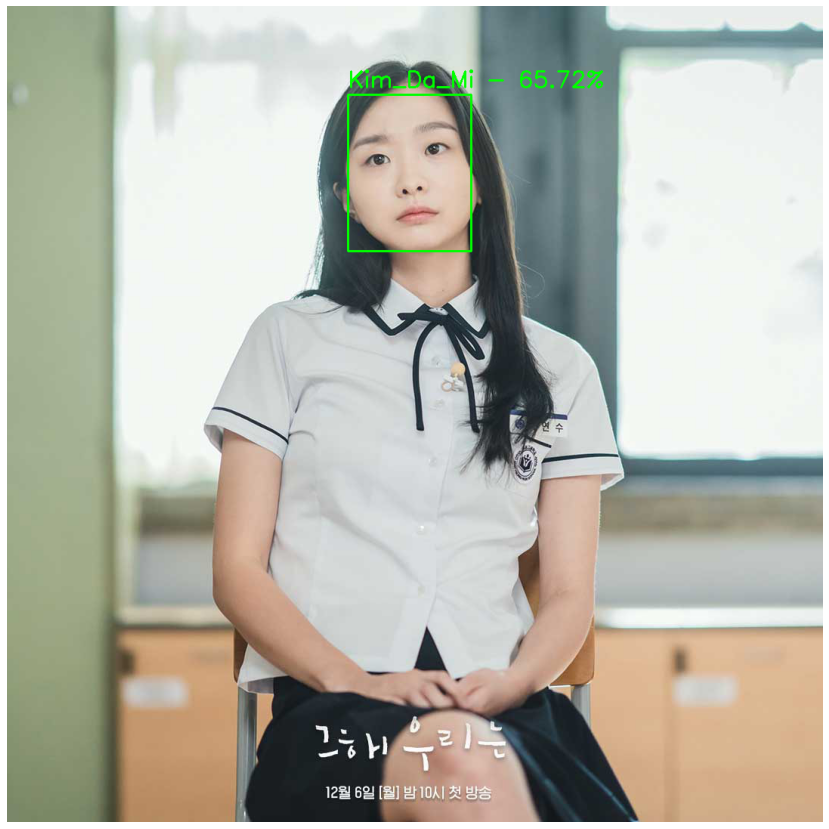

In [24]:
predict_multi_face(image_rgb, svc_model)

# Testing something

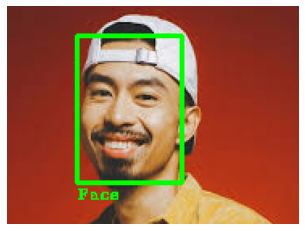

(135, 181, 3)


In [25]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/data-test/data/train/Den_Vau/Screenshot 2024-10-25 193919.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

# Initialize MTCNN detector
detector = MTCNN()

# Detect faces
detections = detector.detect_faces(image_rgb)

# Draw bounding boxes and label each face

x, y, width, height = detections[0]['box']
# Draw bounding box
cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)
# Write label on the bounding box
cv2.putText(image_rgb, 'Face', (x, y + 10 + height), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0, 255, 0), 1)

# Show the result
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print(image_rgb.shape)


In [ ]:
detections

In [ ]:
detections

In [ ]:
import cv2
import numpy as np
import requests

# Đường dẫn URL của ảnh
url = 'https://cdn.tgdd.vn/News/0/1341589-1280x720.jpg'

# Tải ảnh từ URL
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

# Chuyển đổi dữ liệu từ mảng thành ảnh OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN
# Hiển thị ảnh (nếu cần)
plt.axis('off')
plt.imshow(extract_face(image_rgb))

In [ ]:
predict_multi_face(image_rgb)

In [ ]:
def extract_face_url(url, required_size=(160, 160)):
    
    response = requests.get(url)
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

    # Chuyển đổi dữ liệu từ mảng thành ảnh OpenCV
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN
    pixels = np.asarray(image_rgb)
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    
    x2, y2 = x1 + width, y1 + height
    
    face = pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    
    image = image.resize(required_size)
    face_array = np.asarray(image)
    
    return face_array

In [ ]:
import numpy as np
import requests

detector = MTCNN()


url = 'https://cdn.tgdd.vn/News/0/1341589-1280x720.jpg'
# Tải ảnh từ URL
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

detections = detector.detect_faces(image_rgb)
for face in detections:
    x, y, width, height = face['box']
    print(face)
#     extracted_face = image_rgb[y: y + height, x: width]
#     embedded = get_embedding(face_net_model, extracted_face)
#     y_pred = model.predict(embedded.reshape(1,-1))
#     class_pred = label.inverse_transform(y_pred)
    # Draw bounding box
    cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)
    
    # Write label on the bounding box
    cv2.putText(image_rgb, 'Face', (x, y + 10 + height), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 1)
plt.figure(figsize = (15, 15))
plt.imshow(image_rgb)

In [ ]:
filename = '/kaggle/input/data-test/data/train/Duc_Si/z5967134395849_9a7d0a146f92d02846d1f8c230548420.jpg'
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
extract = extract_face(image)
plt.axis('off')
plt.imshow(extract)

In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/data-test/data/train/Kim_Da_Mi/Screenshot 2024-10-25 201449.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

# Initialize MTCNN detector
detector = MTCNN()

# Detect faces
detections = detector.detect_faces(image_rgb)

# Draw bounding boxes
for face in detections:
    x, y, width, height = face['box']
    cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)

# Show the result
predict_image(image_rgb)

# Fine-tuned FaceNet

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, InceptionV3

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Fine tuned using pretrained weights

In [29]:
facenet_model = load_model('/kaggle/input/kerasfaceneth5/facenet_keras.h5')

In [30]:
len(facenet_model.layers)

426

In [47]:
# Lấy đầu ra từ tầng thứ 2 cuối của mô hình
x = facenet_model.layers[-2].output  

# thêm lớp Dense
embedding = Dense(128)(x)  

# thêm lớp chuẩn hóa
output = Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(embedding)  

model = Model(inputs=facenet_model.input, outputs=output)

In [50]:
# đóng băng các tầng của mô hình gốc trừ tầng cần train
for layer in facenet_model.layers[:-2]:  
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())

NameError: name 'tfa' is not defined

In [41]:
y_test

array(['Gumaysi', 'Hoang_Dung', 'Do_mixi', 'Do_Viet_Cuong', 'Den_Vau',
       'Kim_Da_Mi', 'Pew_Pew', 'Faker', 'Ngo_Bao_Chau', 'Duc_Si'],
      dtype='<U13')

In [42]:
y_test_labels = encoder.fit_transform(y_test)
y_test_labels

array([5, 6, 2, 1, 0, 7, 9, 4, 8, 3])

In [77]:
dictionary = dict(zip(y_test, y_test_labels))
dictionary

{'Gumaysi': 5,
 'Hoang_Dung': 6,
 'Do_mixi': 2,
 'Do_Viet_Cuong': 1,
 'Den_Vau': 0,
 'Kim_Da_Mi': 7,
 'Pew_Pew': 9,
 'Faker': 4,
 'Ngo_Bao_Chau': 8,
 'Duc_Si': 3}

In [43]:
y_train_labels = encoder.fit_transform(y_train)
y_train_labels

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [614]:
model.fit(X_train, y_train_labels, epochs=10, batch_size=10)  # Huấn luyện với batch size 10

Epoch 1/10
 7/10 [====================>.........] - ETA: 0s - loss: 0.6934

KeyboardInterrupt: 

In [640]:
model.save_weights("model_weights_fine_tuned.h5") 
# trọng số được lưu và upload lên thư mục input, lần sau muốn dùng chỉ cần tạo mô hình rồi load_weights('path')

In [46]:
trainX_fine_tuned = []

for pixels in tqdm(X_train):
    embedding = get_embedding(model, pixels)
    trainX_fine_tuned.append(embedding)
trainX_fine_tuned = np.asarray(trainX_fine_tuned)

print('Train X fine-tuned:', trainX_fine_tuned.shape)

  0%|          | 0/100 [00:00<?, ?it/s]

Train X fine-tuned: (100, 128)


In [49]:
testX_fine_tuned = []

for pixels in tqdm(X_test):
    embedding = get_embedding(model, pixels)
    testX_fine_tuned.append(embedding)
testX_fine_tuned = np.asarray(testX_fine_tuned)

print('Test X fine-tuned:', testX_fine_tuned.shape)

  0%|          | 0/10 [00:00<?, ?it/s]

Test X fine-tuned: (10, 128)


<AxesSubplot:xlabel='X', ylabel='y'>

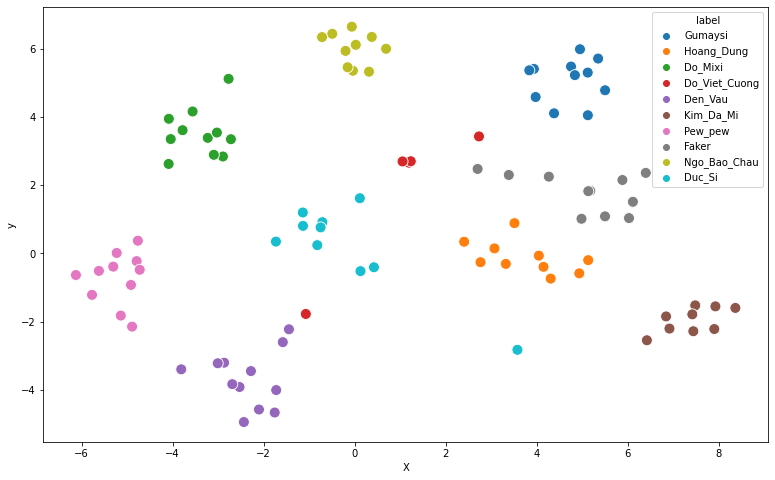

In [39]:

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(learning_rate=100)

tsne_features = tsne.fit_transform(trainX_fine_tuned)

X = tsne_features[:,0]
y = tsne_features[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

In [50]:
svc_model_finetuned = SVC(kernel='linear', probability=True)
svc_model_finetuned.fit(trainX_fine_tuned, y_train_labels)

SVC(kernel='linear', probability=True)

Probability : 65.89408385193451, 
Person - Predicted : ['Do_Viet_Cuong'], Actual : Do_mixi


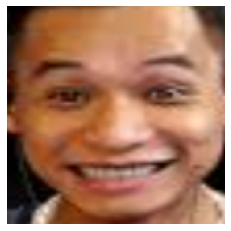

In [51]:
selection = random.choice([i for i in range(testX_fine_tuned.shape[0])])

face = X_test[selection]

yhat_prob = svc_model_finetuned.predict_proba(testX_fine_tuned[selection].reshape(1,-1))
yhat = svc_model_finetuned.predict(testX_fine_tuned[selection].reshape(1,-1))

celeb = label.inverse_transform(yhat)
plt.imshow(face)
plt.axis('off')

print(f'Probability : {np.max(yhat_prob)*100}, \nPerson - Predicted : {celeb}, Actual : {y_test[selection]}')

In [52]:
def predict_multi_face_fine_tuned(image_array, model, clf_model):
    detector = MTCNN()
    detections = detector.detect_faces(image_array)
    extracted_list = extract_multi_face(image_array)
    probability_list = []
    predicted_labels = list()
    for face in extracted_list:
        embedded = get_embedding(model, face)
        y_pred = clf_model.predict(embedded.reshape(1,-1))
        y_prob = clf_model.predict_proba(embedded.reshape(1, -1))
        arg_max = np.argmax(y_prob)
        probability_list.append(np.max(y_prob))
        class_pred = encoder.inverse_transform(y_pred)
        predicted_labels.append(class_pred)
        print(y_prob)
        print(y_pred)
        print(arg_max)
        print(label.inverse_transform(y_pred))
    
    
    image_array_copy = image_array.copy()
    
    for i, face in enumerate(detections):
        x, y, width, height = face['box']
        cv2.rectangle(image_array_copy, (x, y), (x + width, y + height), (0, 255, 0), 2)
        predicted_class = predicted_labels[i][0]
        if (probability_list[i] * 100) < 40:
            predicted_class = 'Unknown'
        cv2.putText(image_array_copy, predicted_class, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(image_array_copy, f'{probability_list[i] * 100: .2f}%', (x, y + height + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    plt.figure(figsize = (15, 15))
    plt.axis('off')
    plt.imshow(image_array_copy)

In [118]:
url = 'https://cdn.tuoitre.vn/471584752817336320/2024/9/4/kim-da-mi1-our-beloved-summer-1725462272165208322197.jpg'
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for MTCNN

[[0.0214862  0.03148238 0.02791482 0.04151917 0.07419026 0.02593042
  0.07292892 0.65058404 0.02050241 0.03346139]]
[7]
7
['Kim_Da_Mi']


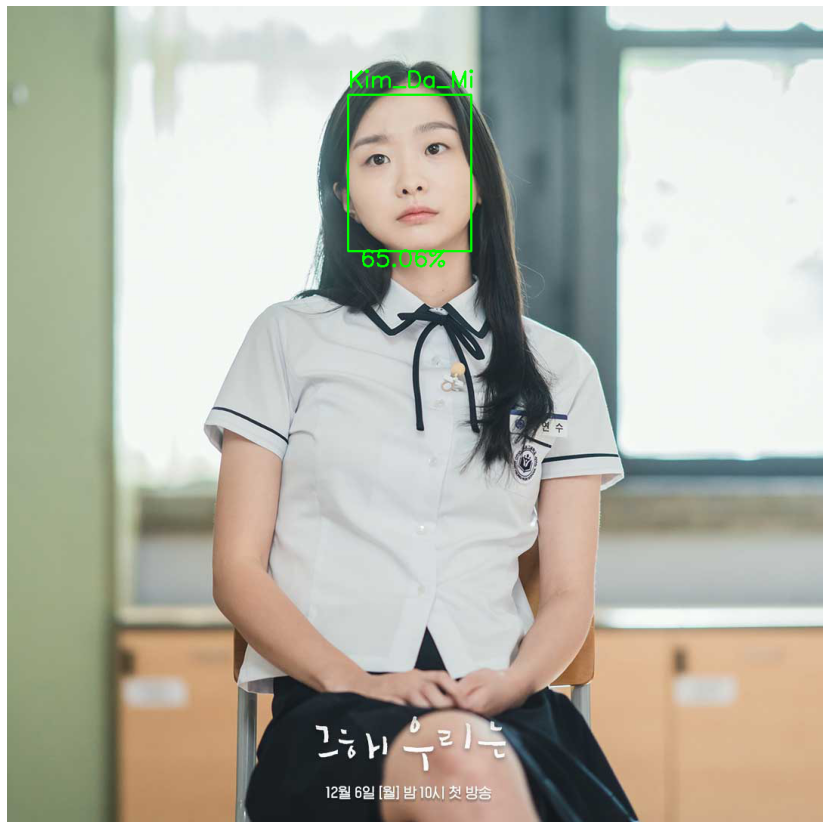

In [122]:
predict_multi_face_fine_tuned(image_rgb, model, svc_model_finetuned)

In [55]:
path = '/kaggle/input/data-test/data/train/Den_Vau/Screenshot 2024-10-25 193924.png'  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[[0.71084337 0.02772765 0.04637852 0.04164886 0.0163737  0.02329977
  0.01622277 0.01909544 0.03022413 0.06818578]]
[0]
0
['Den_Vau']


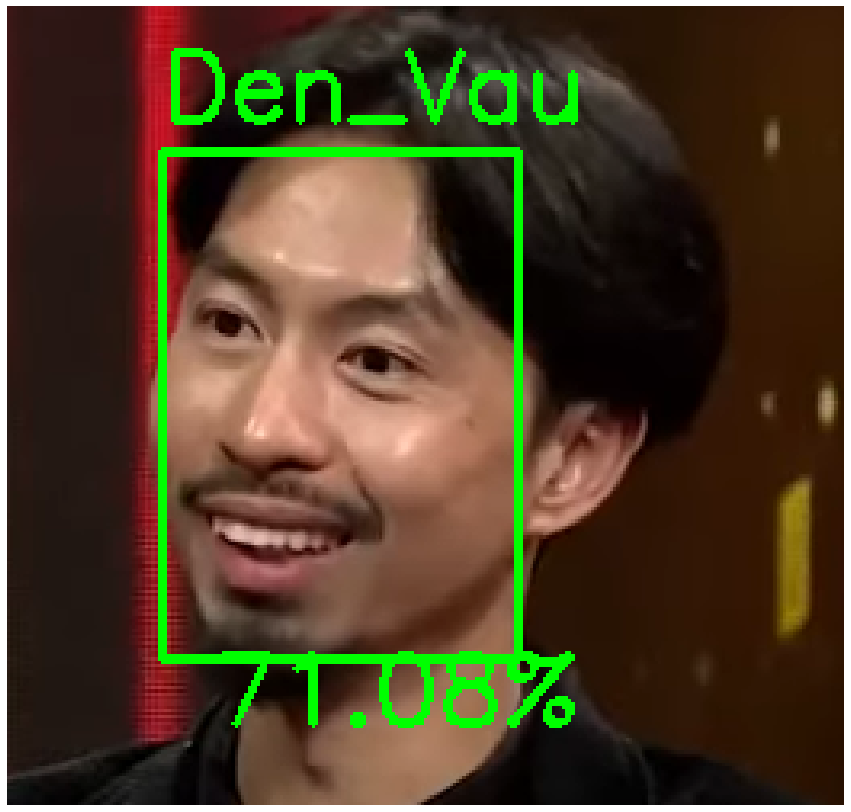

In [56]:
predict_multi_face_fine_tuned(image, model, svc_model_finetuned)

In [31]:
def get_fine_tuned_model():
    facenet_model = load_model('/kaggle/input/kerasfaceneth5/facenet_keras.h5')
    x = facenet_model.layers[-2].output  

    # thêm lớp Dense
    embedding = Dense(128)(x)  

    # thêm lớp chuẩn hóa
    output = Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(embedding)  

    model = Model(inputs=facenet_model.input, outputs=output)
    
    model.load_weights('/kaggle/input/face_net_fine_tuned/keras/default/1/model_weights_fine_tuned.h5')
    
    return model

In [32]:
model = get_fine_tuned_model() #load model và sử dụng ko cần train lại

# PCA

In [57]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(3)
pca_X_train = pca.fit_transform(trainX)

In [75]:
x = pca_X_train[:, 0]
y = pca_X_train[:, 1]
z = pca_X_train[:, 2]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['x'] = X
dataset['y'] = y
dataset['z'] = z

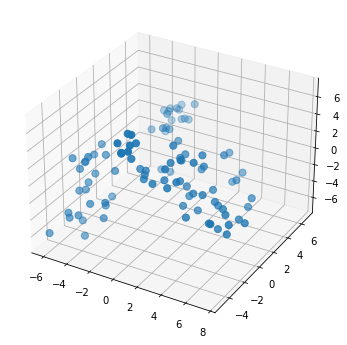

In [80]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', s=50, cmap = dataset['label'])

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(learning_rate=100)

tsne_features = tsne.fit_transform(trainX_fine_tuned)

X = tsne_features[:,0]
y = tsne_features[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

<AxesSubplot:xlabel='X', ylabel='y'>

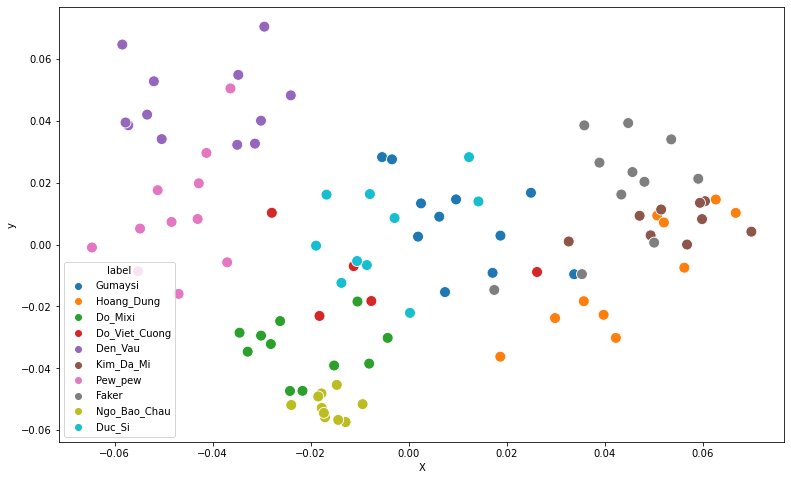

In [117]:
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
import seaborn as sns

pca = KernelPCA(2, kernel = 'rbf', gamma = 0.005)

pca = pca.fit_transform(trainX_fine_tuned)

X = pca[:,0]
y = pca[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

<AxesSubplot:xlabel='X', ylabel='y'>

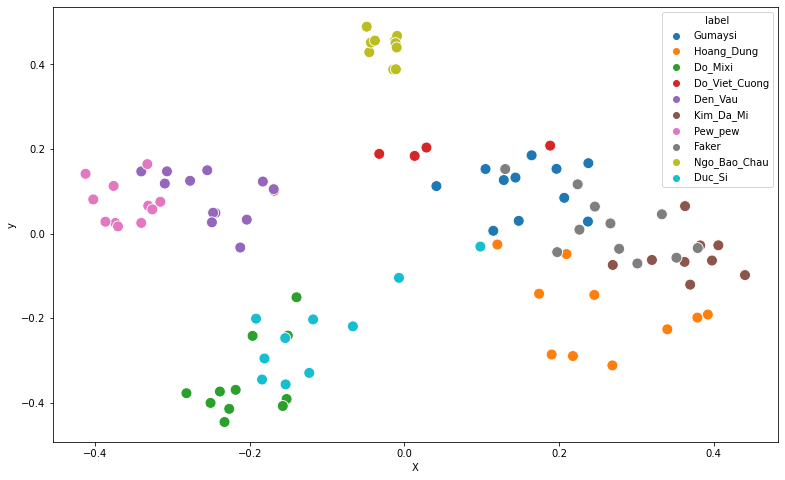

In [113]:
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
import seaborn as sns

pca = KernelPCA(2, kernel = 'rbf', gamma = 0.005)

pca = pca.fit_transform(trainX)

X = pca[:,0]
y = pca[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)